In [89]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
 
import warnings
warnings.filterwarnings("ignore")

# Ensemble methods

In [90]:
from sklearn.datasets import load_wine

wine = load_wine()
df = pd.DataFrame(wine.data, columns = wine.feature_names)

# Sprawedzenie co przedstawiają dane
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [91]:
# Sprawdzenie jak rozkładają się dane
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### DecisionTreeClassifier

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

dtc = DecisionTreeClassifier(min_samples_leaf = 3, random_state = 1).fit(df, wine.target)
scores = cross_val_score(dtc, df, wine.target)
print(f'Decision tree scores: {scores}, (avg: {np.mean(scores)})')

Decision tree scores: [0.94444444 0.80555556 0.80555556 0.91428571 0.97142857], (avg: 0.8882539682539681)


### BaggingClassifier

In [93]:
from sklearn.ensemble import BaggingClassifier

dtc = DecisionTreeClassifier(min_samples_leaf = 3, random_state = 1)
bc = BaggingClassifier(base_estimator = dtc, n_estimators=50, random_state = 1).fit(df, wine.target)
scores = cross_val_score(bc, df, wine.target)
print(f'Bagging scores: {scores}, (avg: {np.mean(scores)})')


Bagging scores: [0.91666667 0.91666667 0.94444444 0.97142857 1.        ], (avg: 0.9498412698412698)


### AdaBoostClassifier

In [94]:
from sklearn.ensemble import AdaBoostClassifier

dtc = DecisionTreeClassifier(max_depth=1, min_samples_leaf=3, random_state=1)
abc = AdaBoostClassifier(base_estimator=dtc, n_estimators=50, algorithm='SAMME', random_state=1).fit(df, wine.target)
scores = cross_val_score(abc,df, wine.target)
print(f'AdaBoost scores: {scores}, (avg: {np.mean(scores)})')

AdaBoost scores: [0.83333333 0.91666667 0.91666667 1.         1.        ], (avg: 0.9333333333333332)


### GradientBoostingClassifier

In [95]:
from sklearn.ensemble import GradientBoostingClassifier

# Fit the model on the whole dataset
gbc = GradientBoostingClassifier(min_samples_leaf=3, n_estimators=50, max_depth=1, learning_rate=1.0, 
                                 subsample=0.5, random_state=1).fit(df, wine.target)

scores = cross_val_score(gbc, df, wine.target)
print(f'Gradient boosting scores: {scores}, (avg: {np.mean(scores)})')

Gradient boosting scores: [0.91666667 0.97222222 0.97222222 0.42857143 0.97142857], (avg: 0.8522222222222222)


Otrzymane wyniki pokryły się z tymi, przedstawionymi w skrypcie. Najwyższą jakość uzyskaliśmy przy użyciu BaggingClassifier, a najniższą - przy użyciu GradientBoostingClassifier.

### Gradient Boosting improvement

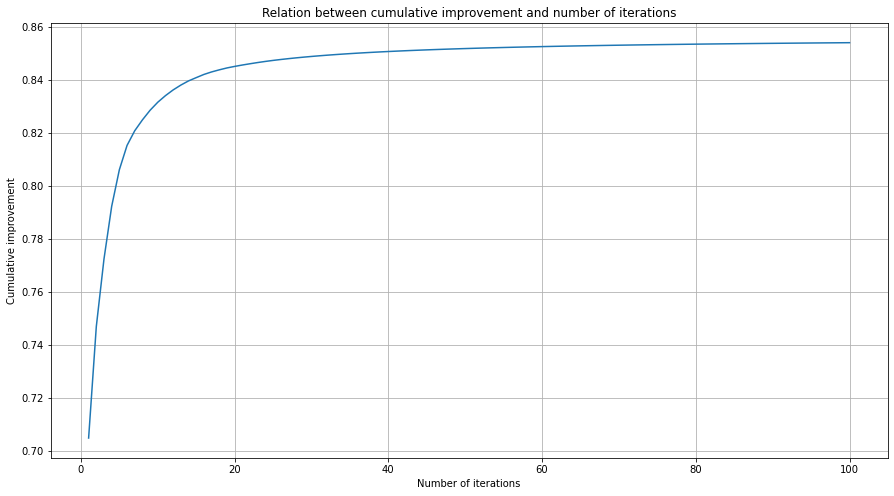

In [96]:
# Cumulative improvement

mean_cumulative_improvement = []
for i in range(1, 101):
    gbc = GradientBoostingClassifier(min_samples_leaf=3, n_estimators=i, max_depth=1, learning_rate=1.0, 
                                 subsample=0.5, random_state=1).fit(df, wine.target)
    mean_cumulative_improvement.append(np.mean(np.cumsum(gbc.oob_improvement_)))

plt.figure(figsize=(15,8))
plt.plot(list(range(1, 101)), mean_cumulative_improvement)
plt.title('Relation between cumulative improvement and number of iterations')
plt.ylabel('Cumulative improvement')
plt.xlabel('Number of iterations')
plt.grid()
plt.show()

Obserwujemy, że wraz ze wzrostem liczby iteracji cumulative improvement przestaje się zwiększać, a więc nie otrzymujemy już znaczącej poprawy.

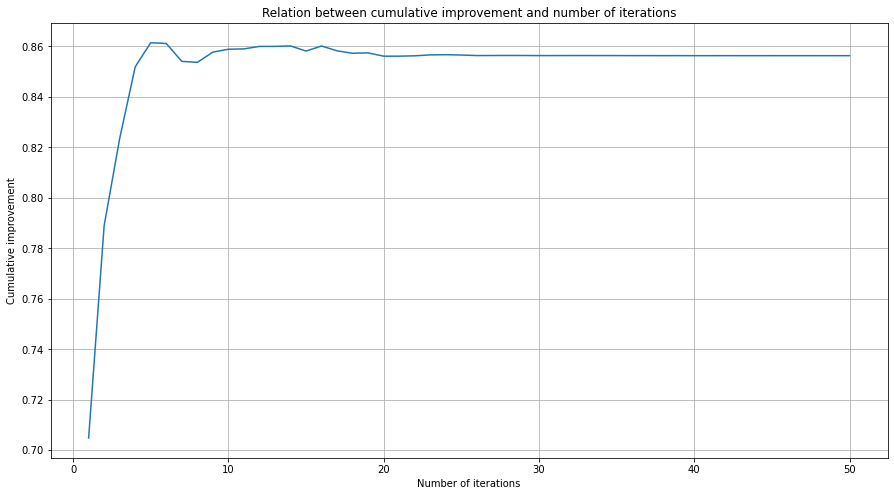

In [97]:
# DLa n_estymators = 50
gbc = GradientBoostingClassifier(min_samples_leaf=3, n_estimators=50, max_depth=1, learning_rate=1.0, 
                                 subsample=0.5, random_state=1).fit(df, wine.target)
cumulative_improvement = np.cumsum(gbc.oob_improvement_)
plt.figure(figsize=(15,8))
plt.plot(list(range(1, 51)), cumulative_improvement)
plt.title('Relation between cumulative improvement and number of iterations')
plt.ylabel('Cumulative improvement')
plt.xlabel('Number of iterations')
plt.grid()
plt.show()